# Classification


In [1]:
# import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm.auto import tqdm

# Apply the default theme
sns.set_theme()


In [2]:
# import track data
df = pd.read_csv('./data/playlist_tracks.csv')
playlist_data = pd.read_csv('./data/playlists.csv')

# merging the playlist info
df = df.merge(playlist_data, on='playlist_id')
df.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,https://p.scdn.co/mp3-preview/dc3f5560d882d3f9...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-10.833,1,0.0923,0.63300,0.89000,0.0972,0.320,126.031,4,Electro chill
1,NaN,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",True,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-8.091,0,0.0485,0.13500,0.00216,0.3110,0.686,120.029,4,Electro chill
2,https://p.scdn.co/mp3-preview/e54ac6ee0aa018cf...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-5.800,0,0.0543,0.16900,0.00244,0.2090,0.293,116.949,4,Electro chill
3,NaN,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-6.751,0,0.0462,0.00926,0.00538,0.1590,0.310,119.996,4,Electro chill
4,https://p.scdn.co/mp3-preview/bacd8fab60c68555...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-17.531,1,0.0884,0.08500,0.87000,0.1110,0.494,114.989,4,Electro chill


## Data Preprocessing


In [3]:
# Selecting the relevant audio features
features = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

df = df[features + ['playlist_name']]
df

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,145599,86,0.853,0.6180,6,-10.833,1,0.0923,0.63300,0.89000,0.0972,0.320,126.031,4,Electro chill
1,199680,44,0.642,0.7340,11,-8.091,0,0.0485,0.13500,0.00216,0.3110,0.686,120.029,4,Electro chill
2,160000,51,0.624,0.7450,1,-5.800,0,0.0543,0.16900,0.00244,0.2090,0.293,116.949,4,Electro chill
3,214000,82,0.704,0.7870,11,-6.751,0,0.0462,0.00926,0.00538,0.1590,0.310,119.996,4,Electro chill
4,152347,58,0.741,0.1590,7,-17.531,1,0.0884,0.08500,0.87000,0.1110,0.494,114.989,4,Electro chill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,217798,41,0.584,0.1390,5,-11.483,1,0.0304,0.96100,0.03690,0.1060,0.240,106.759,4,Summer Jazz
558,290709,45,0.449,0.1420,10,-18.201,1,0.0421,0.94500,0.91400,0.1110,0.131,112.211,4,Summer Jazz
559,179160,37,0.555,0.0929,5,-17.157,0,0.0459,0.99500,0.75900,0.1050,0.642,69.861,3,Summer Jazz
560,289945,36,0.424,0.1030,3,-18.281,1,0.0417,0.93700,0.86100,0.1140,0.135,104.450,4,Summer Jazz


In [4]:
# extracting independent variables
X = df[features]

# extracting dependent variable
y = df[['playlist_name']]


In [5]:
# splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape

(449, 14)

`Ideally, we would create a validation set to perform model tuning and properly analyze model generalization. However, I omitted this step to keep things simple and because I am working with a small dataset.`

Note: for simple model tuning with GridSearch, we will use cross-validation anyway.


In [6]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)
X_train_scaled.head()

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-0.554526,3.241050,1.336143,0.509052,0.834395,0.088376,-1.263082,-0.487361,-0.719828,0.022885,0.152855,1.760635,-0.013070,0.260076
1,0.482408,0.868551,-1.933861,0.861698,-0.042305,0.907694,-1.263082,4.304221,-0.854284,-0.836089,-0.873839,0.282747,1.814343,-2.455605
2,0.192754,-0.317698,-0.266800,0.542492,-1.211239,0.534089,-1.263082,-0.416604,-0.854021,-0.836107,0.877428,0.109187,0.702830,0.260076
3,-0.871907,-0.169417,1.706601,-0.108080,-1.503472,0.385518,-1.263082,0.344338,-0.091219,-0.836144,-0.086513,-0.727056,-0.158104,0.260076
4,-1.008323,-0.910823,-0.088695,-1.217700,1.418861,-1.376041,0.791714,-0.584186,0.973612,0.229993,-0.823377,-0.758612,-1.424604,-2.455605


In [7]:
# encode the playlist names
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_train_encoded[:5]

/Users/paul/Desktop/spotify-autoplaylists/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paul/Desktop/spotify-autoplaylists/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0, 4, 4, 0, 2])

## Feature Selection


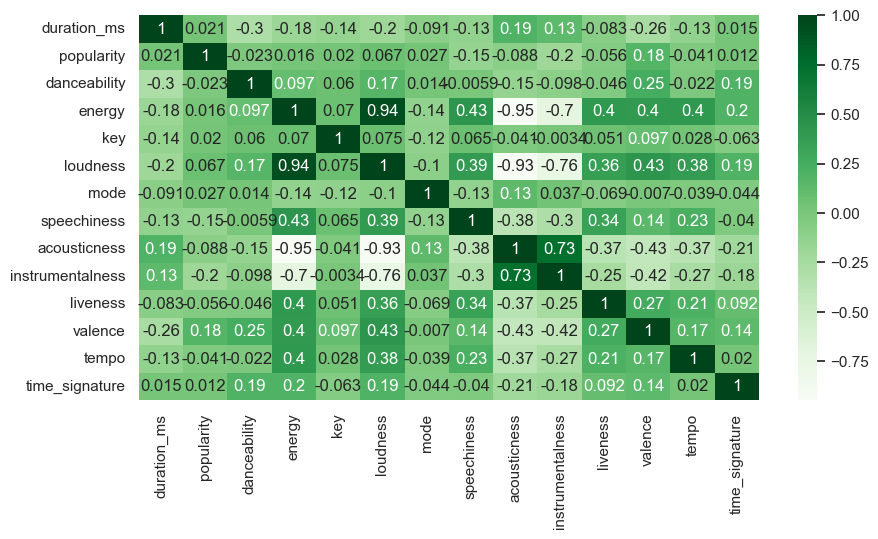

In [8]:
# checking if the audio features are correlated (as well as the popularity)
plt.figure(figsize=(10,5))
sns.heatmap(X_train_scaled.corr(), annot=True, cmap='Greens');

Given the correlation between:

- energy and loudness
- energy and acousticness

I will drop the loudness and acousticness features since it does not seem they bring additional useful information. Energy, which seems most interpretable as well, will convey the main information


In [9]:
# dropping loudness and acousticness
X_train_scaled.drop(columns=['loudness', 'acousticness'], inplace=True)
X_test_scaled.drop(columns=['loudness', 'acousticness'], inplace=True)

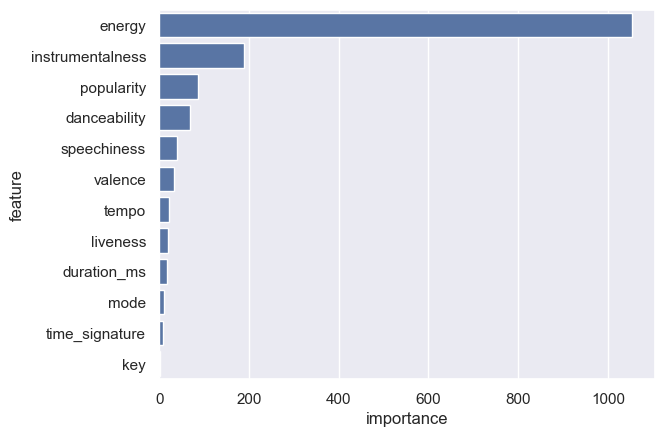

In [10]:
# Anova Feature Selection 
from sklearn.feature_selection import SelectKBest, f_classif  # f_classif for anova f-test

# SelectKBest to extract best features
kbest = SelectKBest(score_func=f_classif, k='all')
fit = kbest.fit(X_train_scaled, y_train_encoded)

dfcolumns = pd.DataFrame(X_train_scaled.columns)
dfscores = pd.DataFrame(fit.scores_)

# creating dataframe
feature_importance_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': fit.scores_
}).sort_values(by='importance', ascending=False)

# plotting the feature importances with sns bar
sns.barplot(x='importance', y='feature', data=feature_importance_df);

- It's interesting to see that Key, Time signature and mode seem to be the less important features here!
- Energy and instrumentalness are important features


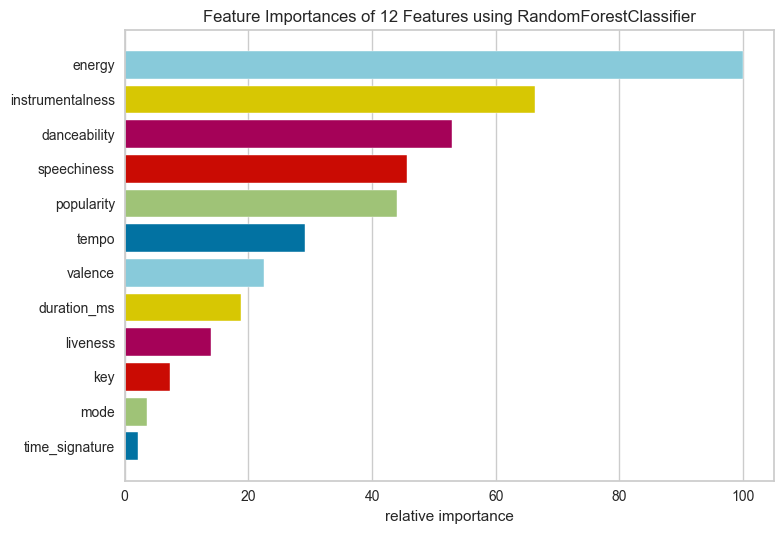

<Axes: title={'center': 'Feature Importances of 12 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [11]:
# feature importance with tree models
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances

model = RandomForestClassifier()
viz = FeatureImportances(model)
viz.fit(X_train_scaled, y_train_encoded)
viz.show()

- We confirm here that time signature, mode and key are the least important features. We will therefore remove
- Again, energy and instrumentalness are important here!


In [12]:
# dropping the least important features
X_train_scaled.drop(columns=['time_signature', 'key', 'mode'], inplace=True)
X_test_scaled.drop(columns=['time_signature', 'key', 'mode'], inplace=True)

## Modeling - Ensemble model


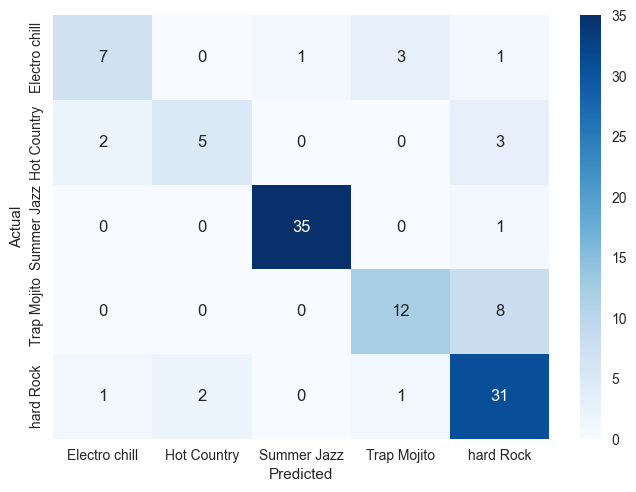

In [13]:
# let's start with a simple Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, max_depth=3)
rf_model.fit(X_train_scaled, y_train_encoded)

# making predictions
y_pred = rf_model.predict(X_test_scaled)

# plotting confusion matrix on test set
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [14]:
# printing a little classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


               precision    recall  f1-score   support

Electro chill       0.70      0.58      0.64        12
  Hot Country       0.71      0.50      0.59        10
  Summer Jazz       0.97      0.97      0.97        36
  Trap Mojito       0.75      0.60      0.67        20
    hard Rock       0.70      0.89      0.78        35

     accuracy                           0.80       113
    macro avg       0.77      0.71      0.73       113
 weighted avg       0.80      0.80      0.79       113



In [15]:
# a little model fine-tuning 
from sklearn.model_selection import GridSearchCV, StratifiedKFold

param_grid = {
    'n_estimators': [5, 20, 100],
    'max_depth': [None, 3, 10, 20],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# stratified cross-validation for the grid search 
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv_strategy, n_jobs=-1, scoring='f1_micro')
grid_search.fit(X_train_scaled, y_train_encoded)

results_df = pd.DataFrame(grid_search.cv_results_)
print(f'Best parameters: {grid_search.best_params_}')
results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head(5)


Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


,params,mean_test_score,std_test_score,rank_test_score
68,"{'bootstrap': False, 'max_depth': 20, 'min_sam...",0.919750,0.021909,1
65,"{'bootstrap': False, 'max_depth': 20, 'min_sam...",0.915306,0.023174,2
5,"{'bootstrap': True, 'max_depth': None, 'min_sa...",0.915281,0.025363,3
32,"{'bootstrap': True, 'max_depth': 20, 'min_samp...",0.915281,0.026318,3
23,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",0.913084,0.018125,5


In [16]:
# evaluating the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))


               precision    recall  f1-score   support

Electro chill       0.91      0.83      0.87        12
  Hot Country       0.88      0.70      0.78        10
  Summer Jazz       1.00      1.00      1.00        36
  Trap Mojito       0.95      0.95      0.95        20
    hard Rock       0.89      0.97      0.93        35

     accuracy                           0.94       113
    macro avg       0.93      0.89      0.91       113
 weighted avg       0.94      0.94      0.94       113



## Modeling - Deep Learning


In [17]:
# importing DL libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [18]:
# Convert to tensors
X_train_tensor = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)


In [19]:
# creating clean torch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# creating dataloaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


In [20]:
# sanity check
X, y = next(iter(train_loader))
print("nb features:", X_train_scaled.shape[1])
print(X.shape, y.shape)

nb features: 9
torch.Size([8, 9]) torch.Size([8])


In [21]:
# NN model class
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activation=F.relu, dropout=0.1):
        super(NeuralNet, self).__init__()
        
        # I want my model to be flexible, so I will allow for multiple hidden layers
        layers = []
        
        # Input layer to first hidden layer, hidden_sizes len should be at least 1
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.Dropout(dropout)) 
        
        # Adding hidden layers
        for i in range(1, len(hidden_sizes)):
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            layers.append(nn.Dropout(dropout))
        
        # Output layer
        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        
        # Store the layers in a ModuleList
        self.layers = nn.ModuleList(layers)

        # store the activation function
        self.activation = activation

    # forward pass
    def forward(self, x):
        # Pass input through each layer in the network
        for i in range(len(self.layers) - 1):
            x = self.layers[i](x)

            # we add the activation if layer is not dropout
            if isinstance(self.layers[i], nn.Linear):
                x = self.activation(x)
        
        # no activation for the last layer
        x = self.layers[-1](x)
        
        return x

In [22]:
# initializing the model
input_size = X_train_scaled.shape[1]
output_size = len(label_encoder.classes_)
hidden_sizes = [8, 8]

model = NeuralNet(input_size, hidden_sizes, output_size)
model

NeuralNet(
  (layers): ModuleList(
    (0): Linear(in_features=9, out_features=8, bias=True)
    (1): Dropout(p=0.1, inplace=False)
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Linear(in_features=8, out_features=5, bias=True)
  )
)

In [23]:
# sanity check for the model
X_sample, y_sample = next(iter(train_loader))
y_pred = model(X_sample)

print("Input shape:", X_sample.shape)
print("Output shape:", y_pred.shape)

y_pred

Input shape: torch.Size([8, 9])
Output shape: torch.Size([8, 5])


tensor([[-0.0873,  0.0226, -0.1805, -0.0503, -0.5121],
        [-0.0682,  0.0860,  0.0168, -0.1459, -0.4007],
        [-0.0490,  0.1147, -0.1674, -0.0616, -0.4251],
        [ 0.0142,  0.0032, -0.2211, -0.0163, -0.3339],
        [-0.0206,  0.0781, -0.2759,  0.1690, -0.5274],
        [ 0.0178,  0.1208, -0.0331, -0.0434, -0.4325],
        [-0.0444,  0.0888, -0.0811, -0.0913, -0.4146],
        [-0.0209,  0.2183,  0.0645,  0.0941, -0.5963]],
       grad_fn=<AddmmBackward0>)

In [24]:
# little training function
def train_model(model, train_loader, eval_loader, optimizer, device='cpu', epochs=5):

    # move model to device
    model.to(device)

    # history
    history = {'train_loss': [],
               'train_acc': [],
               'valid_loss': [],
               'valid_acc': []}

    # setup loss function for multi-class classification
    criterion = nn.CrossEntropyLoss()

    # training loop
    print('Training Start')
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_acc = 0
        valid_loss = 0
        valid_acc = 0
        for x, y in train_loader:
            # move data to device
            x = x.to(device)
            y = y.to(device)

            # forward pass
            outputs = model(x)
            cur_train_loss = criterion(outputs, y)
            cur_train_acc = (outputs.argmax(dim=1) == y).float().mean().item()

            # backpropagation
            optimizer.zero_grad()
            cur_train_loss.backward()

            # update weights
            optimizer.step()

            # loss and acc
            train_loss += cur_train_loss
            train_acc += cur_train_acc

        # valid start
        model.eval()
        with torch.no_grad():
            for x, y in eval_loader:
                x = x.to(device)
                y = y.to(device)
                
                # predict
                outputs = model(x)
                cur_valid_loss = criterion(outputs, y)
                cur_valid_acc = (outputs.argmax(dim=1) == y).float().mean().item()
                
                # loss and acc
                valid_loss += cur_valid_loss
                valid_acc += cur_valid_acc

        # epoch output
        train_loss = (train_loss/len(train_loader)).item()
        train_acc = train_acc/len(train_loader)
        val_loss = (valid_loss/len(eval_loader)).item()
        val_acc = valid_acc/len(eval_loader)
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['valid_loss'].append(val_loss)
        history['valid_acc'].append(val_acc)
        print(f"Epoch:{epoch + 1} / {epochs}, train loss:{train_loss:.4f} train_acc:{train_acc:.4f}, valid loss:{val_loss:.4f} valid acc:{val_acc:.5f}")

    return history

In [38]:
# initializing the model
input_size = X_train_scaled.shape[1]
output_size = len(label_encoder.classes_)
hidden_sizes = [8, 8]

model = NeuralNet(input_size, hidden_sizes, output_size)

In [39]:
# training the model
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
history = train_model(model, train_loader, test_loader, optimizer, epochs=10)

Training Start
Epoch:1 / 10, train loss:1.2096 train_acc:0.5197, valid loss:0.8120 valid acc:0.62832
Epoch:2 / 10, train loss:0.8199 train_acc:0.5899, valid loss:0.6612 valid acc:0.74336
Epoch:3 / 10, train loss:0.6264 train_acc:0.7588, valid loss:0.4879 valid acc:0.77876
Epoch:4 / 10, train loss:0.5564 train_acc:0.7719, valid loss:0.4025 valid acc:0.84956
Epoch:5 / 10, train loss:0.5087 train_acc:0.8246, valid loss:0.3954 valid acc:0.88496
Epoch:6 / 10, train loss:0.4437 train_acc:0.8465, valid loss:0.3485 valid acc:0.89381
Epoch:7 / 10, train loss:0.4735 train_acc:0.8202, valid loss:0.3823 valid acc:0.88496
Epoch:8 / 10, train loss:0.4156 train_acc:0.8531, valid loss:0.4008 valid acc:0.86726
Epoch:9 / 10, train loss:0.4320 train_acc:0.8268, valid loss:0.4067 valid acc:0.89381
Epoch:10 / 10, train loss:0.4020 train_acc:0.8487, valid loss:0.3592 valid acc:0.92035


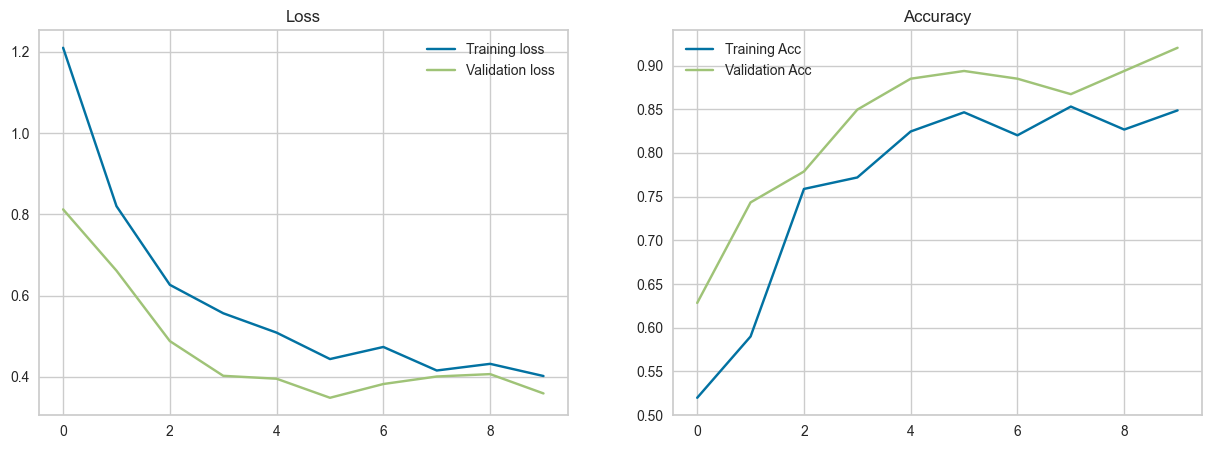

In [40]:
# plotting training history
train_loss_hist = history['train_loss']
val_loss_hist = history['valid_loss']
train_acc_hist = history['train_acc']
val_acc_hist = history['valid_acc']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(train_loss_hist, ax=axes[0], label='Training loss')
sns.lineplot(val_loss_hist, ax=axes[0], label='Validation loss')
axes[0].set_title("Loss")
axes[0].legend()

sns.lineplot(train_acc_hist, ax=axes[1], label='Training Acc')
sns.lineplot(val_acc_hist, ax=axes[1], label='Validation Acc')
axes[1].set_title("Accuracy")
axes[1].legend()
plt.show()

In [41]:
# evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(test_loader.dataset.tensors[0])

# converting logits to class
y_pred_class = y_pred.argmax(dim=1).numpy()

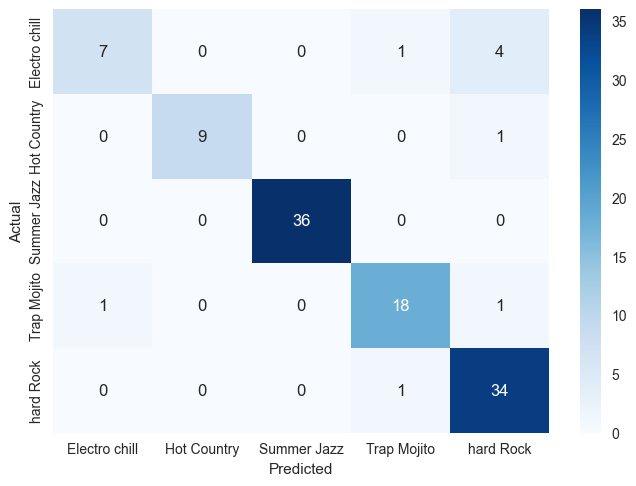

In [42]:
# plotting confusion matrix on test set
conf_matrix = confusion_matrix(y_test_encoded, y_pred_class)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [43]:
# printing a little classification report
print(classification_report(y_test_encoded, y_pred_class, target_names=label_encoder.classes_))


               precision    recall  f1-score   support

Electro chill       0.88      0.58      0.70        12
  Hot Country       1.00      0.90      0.95        10
  Summer Jazz       1.00      1.00      1.00        36
  Trap Mojito       0.90      0.90      0.90        20
    hard Rock       0.85      0.97      0.91        35

     accuracy                           0.92       113
    macro avg       0.93      0.87      0.89       113
 weighted avg       0.92      0.92      0.92       113



### Saving Model


In [44]:
# saving the model
model_path = "models/neural_net_model.pth"
torch.save(model.state_dict(), model_path)

In [45]:
# saving the label encoder
import pickle
# Save the label encoder and scaler
with open('models/preprocessing.pkl', 'wb') as f:
    pickle.dump({'label_encoder': label_encoder, 'scaler': scaler}, f)